In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dense_flight import get_dense_flights_data

data = get_dense_flights_data(r"C:\Users\Allan\Desktop\FlightDelayPrediction\data\data_preprocessed.parquet")

In [18]:
size_grouped = data.groupby('FLIGHT_ID').size().reset_index()
size_grouped.columns = ['FLIGHT_ID','num']
size_grouped.head()

,FLIGHT_ID,num
0,AA1000,421
1,AA1002,391
2,AA1003,621
3,AA1004,604
4,AA1005,98


c:\Users\Allan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


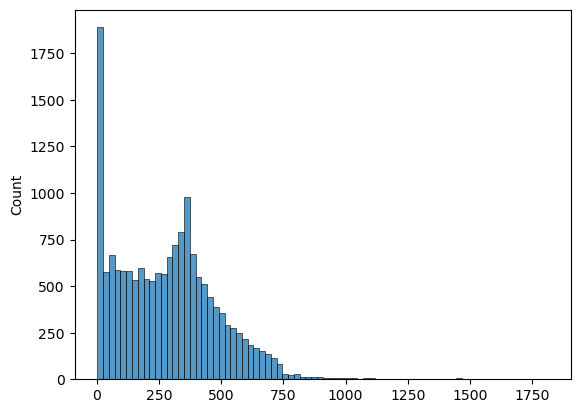

In [15]:
sns.histplot(data=size_grouped)
plt.show()

In [21]:
data = data.merge(size_grouped,on='FLIGHT_ID',how='left')
data = data.loc[data['num'] >= 100]

In [24]:
data.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ORIGIN_AIRPORT_IATA',
       'DESTINATION_AIRPORT_IATA', 'Date', 'SD', 'DT', 'WF', 'WN', 'SA', 'AT',
       'FLIGHT_ID', 'num'],
      dtype='object')

In [41]:
sub_data = data[['FLIGHT_ID','Date','SCHEDULED_DEPARTURE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']].sort_values(['FLIGHT_ID','Date','SCHEDULED_DEPARTURE']).reset_index(drop=True)
shifted_data = sub_data.groupby('FLIGHT_ID', sort=False)[['Date', 'SCHEDULED_DEPARTURE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].shift(1)
sub_data = pd.concat([sub_data, shifted_data], axis=1)
sub_data.columns = ['FLIGHT_ID', 'Date', 'SCHEDULED_DEPARTURE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'Date_prev', 'SCHEDULED_DEPARTURE_prev', 'ORIGIN_AIRPORT_prev', 'DESTINATION_AIRPORT_prev']
sub_data.head(20)

,FLIGHT_ID,Date,SCHEDULED_DEPARTURE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,Date_prev,SCHEDULED_DEPARTURE_prev,ORIGIN_AIRPORT_prev,DESTINATION_AIRPORT_prev
0,AA1000,2015-05-22,140,DFW,LGA,NaT,NaN,NaN,NaN
1,AA1000,2015-06-04,1155,DFW,TPA,2015-05-22,140.0,DFW,LGA
2,AA1000,2015-06-04,1612,TPA,DFW,2015-06-04,1155.0,DFW,TPA
3,AA1000,2015-06-05,1155,DFW,TPA,2015-06-04,1612.0,TPA,DFW
4,AA1000,2015-06-05,1612,TPA,DFW,2015-06-05,1155.0,DFW,TPA
5,AA1000,2015-06-06,1155,DFW,TPA,2015-06-05,1612.0,TPA,DFW
6,AA1000,2015-06-06,1612,TPA,DFW,2015-06-06,1155.0,DFW,TPA
7,AA1000,2015-06-07,1155,DFW,TPA,2015-06-06,1612.0,TPA,DFW
8,AA1000,2015-06-07,1612,TPA,DFW,2015-06-07,1155.0,DFW,TPA
9,AA1000,2015-06-08,1155,DFW,TPA,2015-06-07,1612.0,TPA,DFW


In [43]:
def check_circuit(row):
    if row['Date_prev'] is None or row['Date_prev'] != row['Date']: return True
    else:
        if row['DESTINATION_AIRPORT_prev'] == row['ORIGIN_AIRPORT']: return True
        else: return False

sub_data['is_circuit'] = sub_data.apply(check_circuit,axis=1)
sub_data.head(10)

,FLIGHT_ID,Date,SCHEDULED_DEPARTURE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,Date_prev,SCHEDULED_DEPARTURE_prev,ORIGIN_AIRPORT_prev,DESTINATION_AIRPORT_prev,is_circuit
0,AA1000,2015-05-22,140,DFW,LGA,NaT,NaN,NaN,NaN,True
1,AA1000,2015-06-04,1155,DFW,TPA,2015-05-22,140.0,DFW,LGA,True
2,AA1000,2015-06-04,1612,TPA,DFW,2015-06-04,1155.0,DFW,TPA,True
3,AA1000,2015-06-05,1155,DFW,TPA,2015-06-04,1612.0,TPA,DFW,True
4,AA1000,2015-06-05,1612,TPA,DFW,2015-06-05,1155.0,DFW,TPA,True
5,AA1000,2015-06-06,1155,DFW,TPA,2015-06-05,1612.0,TPA,DFW,True
6,AA1000,2015-06-06,1612,TPA,DFW,2015-06-06,1155.0,DFW,TPA,True
7,AA1000,2015-06-07,1155,DFW,TPA,2015-06-06,1612.0,TPA,DFW,True
8,AA1000,2015-06-07,1612,TPA,DFW,2015-06-07,1155.0,DFW,TPA,True
9,AA1000,2015-06-08,1155,DFW,TPA,2015-06-07,1612.0,TPA,DFW,True


In [44]:
circuit_data = sub_data.loc[sub_data['is_circuit'] == True]
print(circuit_data.shape[0])
print(circuit_data['FLIGHT_ID'].nunique())

4456448
12509


In [46]:
other_data = sub_data.loc[sub_data['is_circuit'] == False]
print(other_data.shape[0])
print(other_data['FLIGHT_ID'].nunique())
other_data.head(20)

1376
73


,FLIGHT_ID,Date,SCHEDULED_DEPARTURE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,Date_prev,SCHEDULED_DEPARTURE_prev,ORIGIN_AIRPORT_prev,DESTINATION_AIRPORT_prev,is_circuit
29352,AA1103,2015-03-06,600,LGA,DFW,2015-03-06,600.0,JFK,DFW,False
83466,AA1277,2015-07-28,1825,ORD,CLT,2015-07-28,130.0,CLT,MIA,False
92271,AA1297,2015-04-20,1040,EWR,JFK,2015-04-20,700.0,MIA,JFK,False
343954,AA226,2015-06-06,2230,HNL,DFW,2015-06-06,1510.0,DFW,MCI,False
343961,AA226,2015-06-13,2230,HNL,DFW,2015-06-13,1510.0,DFW,MCI,False
343968,AA226,2015-06-20,2230,HNL,DFW,2015-06-20,1510.0,DFW,MCI,False
343975,AA226,2015-06-27,2230,HNL,DFW,2015-06-27,1510.0,DFW,MCI,False
343982,AA226,2015-07-04,2230,HNL,DFW,2015-07-04,1510.0,DFW,MCI,False
343989,AA226,2015-07-11,2230,HNL,DFW,2015-07-11,1510.0,DFW,MCI,False
343996,AA226,2015-07-18,2230,HNL,DFW,2015-07-18,1510.0,DFW,MCI,False
